<a href="https://colab.research.google.com/github/priyankamishr/Supervised-ML/blob/K-NN/Breast_Cancer_Prediction_using_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Prediction using the dataset from sklearn
inspired from https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

The dataset contains two types of classes:
1. Malignant: denoted as 0
2. Benign: denoted as 1


In [18]:
breast_cancer =  load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
x = df[['mean area', 'mean compactness']]
y = pd.get_dummies(pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names), drop_first = True)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.3)

In [21]:
knn = KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')
knn.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(x_test)

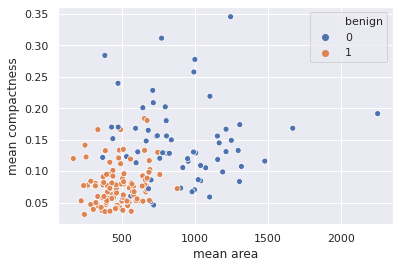

In [28]:
sns.scatterplot(x = 'mean area', y = 'mean compactness', hue = 'benign', data =  x_test.join(y_test, how = 'outer'))

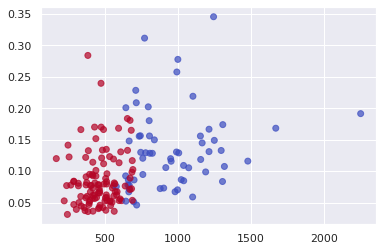

In [33]:
plt.scatter(x_test['mean area'], x_test['mean compactness'], c = y_pred, cmap = 'coolwarm', alpha = 0.7)

In [34]:
confusion_matrix(y_test, y_pred)

array([[49, 14],
       [11, 97]])

KNN compute based upon the distance , that means we should scale the data.

In [36]:
Accuracy = (49+97)/(49+14+11+97)
Accuracy

0.8538011695906432